## Import Library

Melakukan import library yang digunakan dalam proyek ini

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## Data Loading

Menampilkan dataset yang akan digunakan pada proyek ini

In [4]:
df = pd.read_csv('Laptop_price.csv')
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


## Exploratory Data Analysis

Melakukan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

### Deskripsi Variabel

Menampilkan informasi dari variabel-variabel pada dataset Laptop Price

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


Berdasarkan informasi diatas, dataset terdiri dari 1000 baris dengan 7 variabel yang memiliki tipe data dari sudah sesuai. Terlihat juga semua variabel tidak memiliki indikasi missing value.

---

Menampilkan deskripsi dari variabel-variabel numerik pada dataset Laptop Price

In [6]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


### Missing Values

Mengecek missing value pada dataset

In [7]:
df.isnull().sum()

,0
Brand,0
Processor_Speed,0
RAM_Size,0
Storage_Capacity,0
Screen_Size,0
Weight,0
Price,0


Tidak ditemukan adanya missing value dalam dataset ini

### Duplicated Data

Mengecek duplicated data pada dataset

In [8]:
df.duplicated().sum()

np.int64(0)

Tidak ditemukan duplicate data pada dataset ini

### Outliers

Meampilkan boxplot setiap variabel numberik untuk mengecek kemungkinan adanya outliner pada dataset

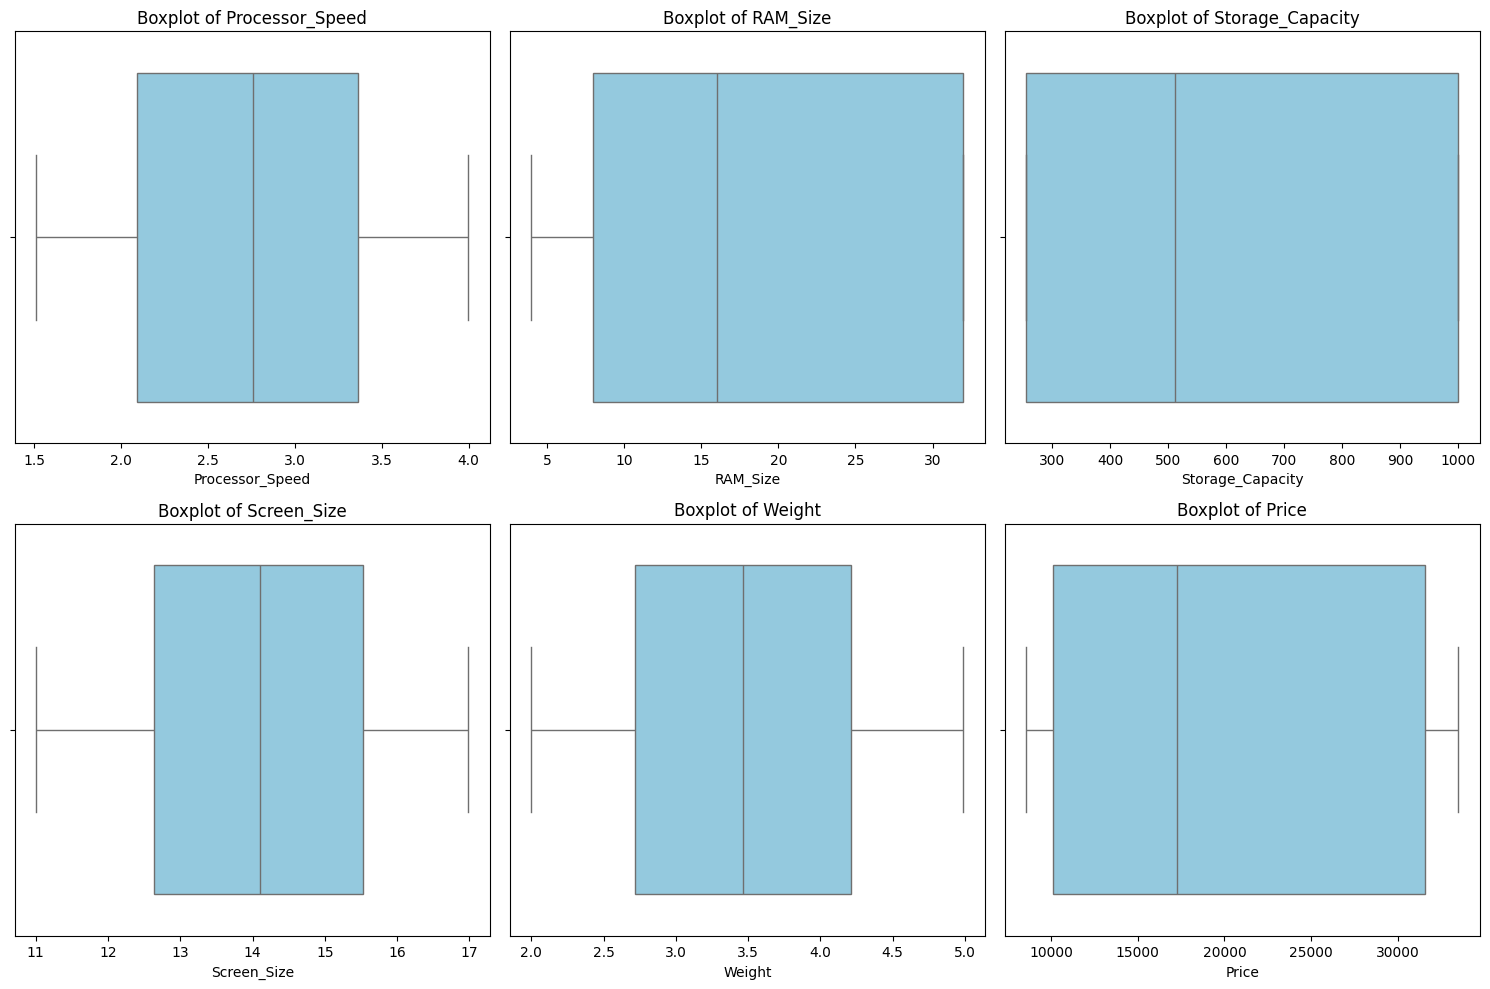

In [9]:
numerical_cols = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']

# Menampilkan boxplot untuk tiap kolom
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

Melakukan pembersihan pada outliner yang dirasa ada

In [10]:
# Ambil hanya kolom numerikal
numeric_cols = df.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df = df[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
df.shape

(1000, 7)

Setelah melakukan pembersihan, dataset memang bebas dari adanya outliner

### Univariate Analysis

Melakukan analisis data yang menguji satu variabel secara individu, tanpa menghubungkannya dengan variabel lain

---
Menginisiasi variabel menjadi dua, numerical_features dan categorical_features

In [11]:
numerical_features = ['Processor_Speed', 'RAM_Size',	'Storage_Capacity',	'Screen_Size',	'Weight',	'Price']
categorical_features = ['Brand']

#### Categorical Features

Menampilkan jumlah sampel yang lalu dijadikan histogram pada dataset yang berada di kolom Brand

        jumlah sampel  persentase
Brand                            
Dell              210        21.0
Asus              206        20.6
Acer              204        20.4
Lenovo            190        19.0
HP                190        19.0


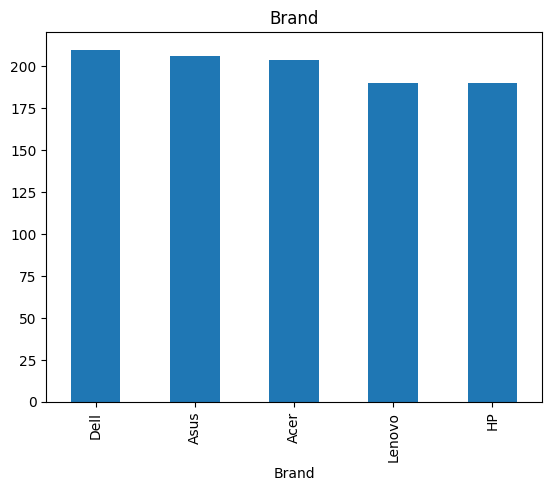

In [12]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
categorical_df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(categorical_df)
count.plot(kind='bar', title=feature);

Semua kategori sudah sangat balance dan tidak memiliki kategori yang dominan

#### Numerical Features

Menampilkan histogram variabel-variabel numerik

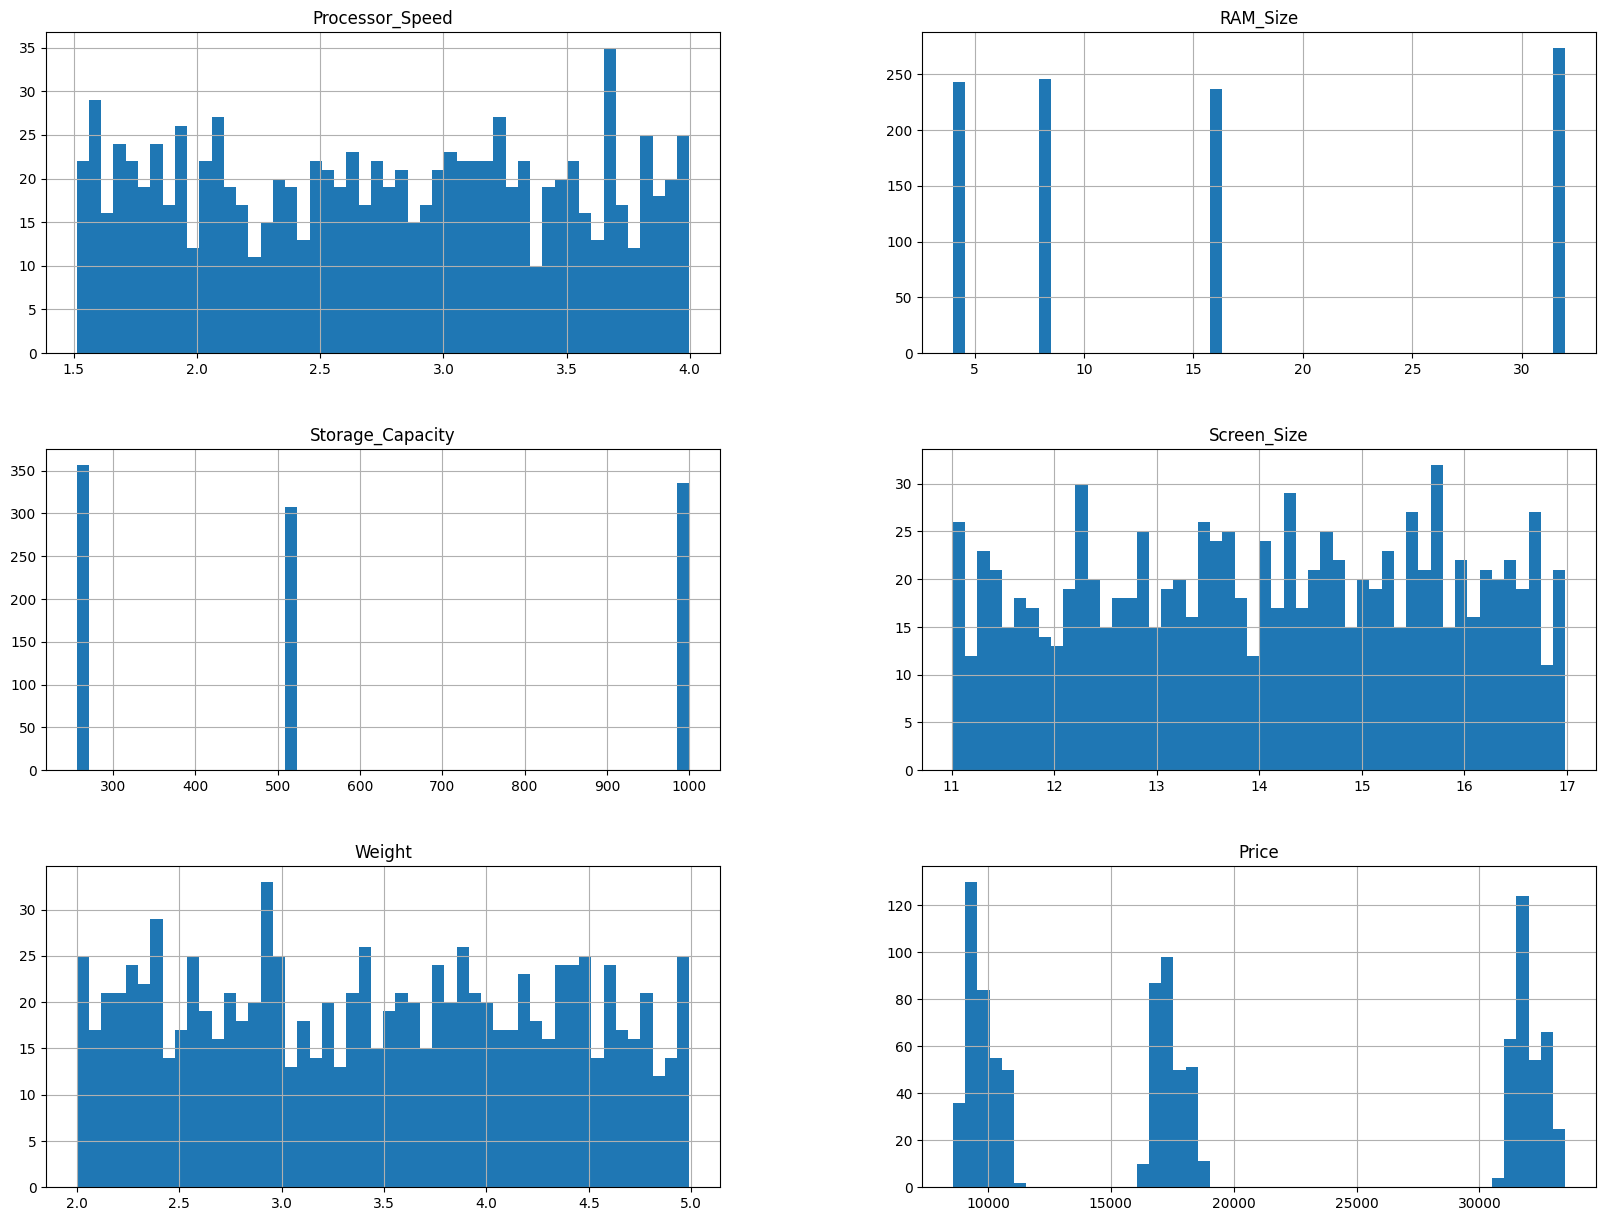

In [13]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Histogram menunjukkan bahwa sebagian besar fitur seperti Processor_Speed, Screen_Size, dan Weight memiliki distribusi kontinu yang merata, sedangkan RAM_Size, Storage_Capacity, dan Price bersifat diskrit dengan pola multimodal atau terbatas pada nilai-nilai tertentu.

### Multivariate Analysis

Menampilkan hubungan antara dua atau lebih variabel pada data

#### Categorical Features

Menampilkan rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga.

<ipython-input-14-4d67961a612b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")


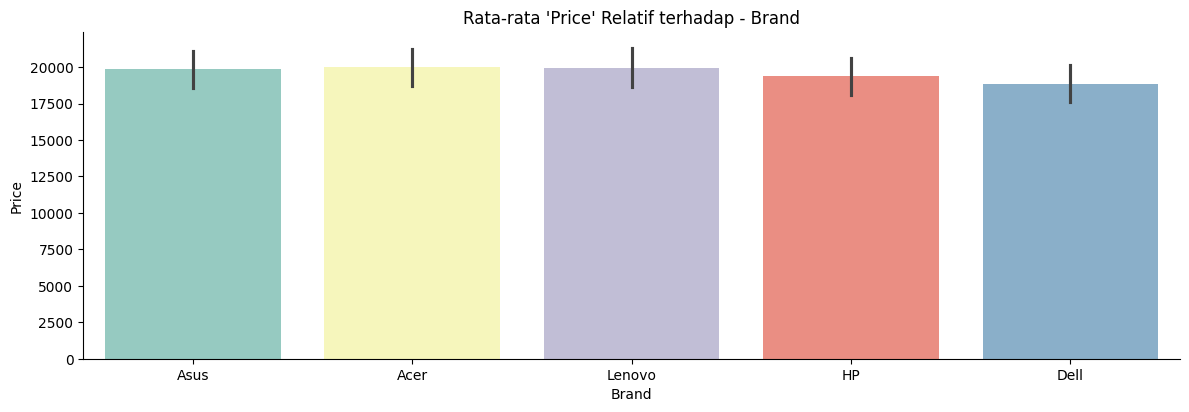

In [14]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'Price' Relatif terhadap - {}".format(col))

Gambar di atas menunjukkan analisis hubungan antara rata-rata harga (Price) dengan masing-masing Brand laptop. Dapat dilihat bahwa perbedaan harga antar merek relatif kecil, dengan Asus, Acer, dan Lenovo memiliki rata-rata harga sedikit lebih tinggi dibanding HP dan Dell, namun secara umum seluruh merek memiliki kisaran harga yang serupa.

#### Numerical Features

Mengamati hubungan antara fitur numerik menggunakan fungsi pairplot()

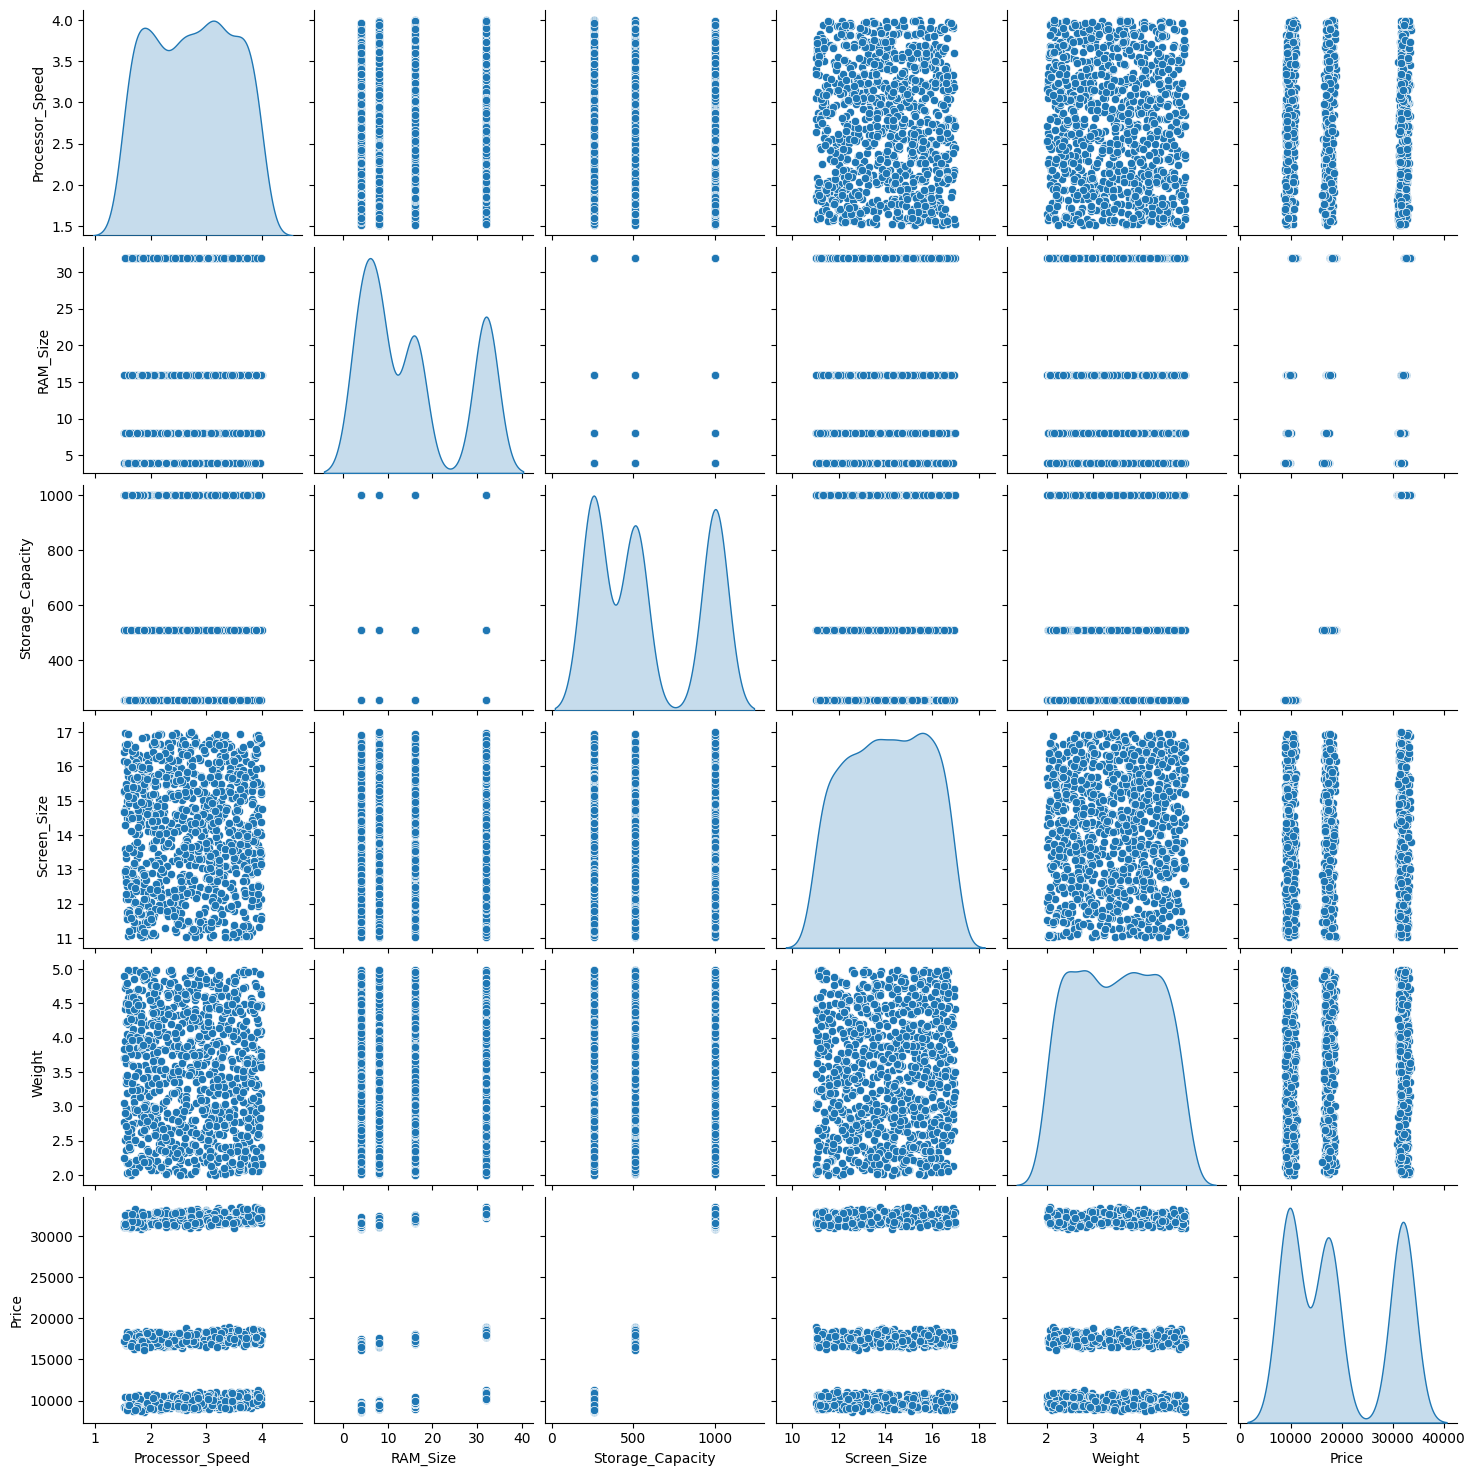

In [15]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Sebagian besar fitur numerik tidak memiliki hubungan linear yang kuat dan terdistribusi cukup merata, dengan fitur seperti RAM dan Storage bersifat diskrit.

Menampilkan Correlation Matrix untuk fitur numerik

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

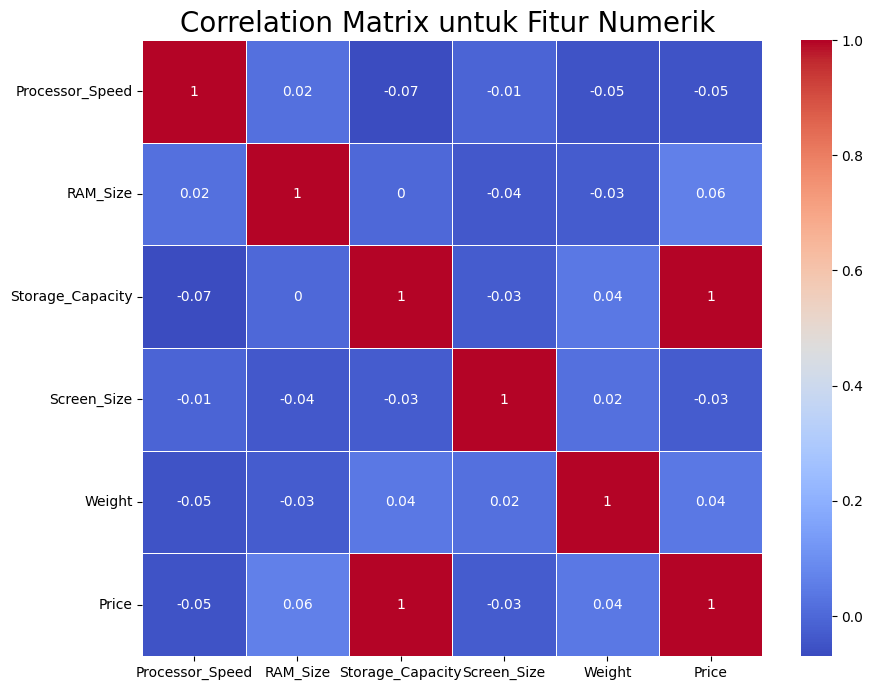

In [16]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Correlation matrix menunjukkan bahwa hanya ada satu hubungan linear yang kuat antara fitur numerik dan harga (Storage_Capacity), namun sisanya pada nilai korelasi di sekitar nol.

## Data Preparation

Melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan

### Encoding Fitur Kategori

In [17]:
from sklearn.preprocessing import  OneHotEncoder

df = pd.concat([df, pd.get_dummies(df['Brand'], prefix='Brand', dtype=int)],axis=1)
df.drop(['Brand'], axis=1, inplace=True)
df.head()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11.185147,2.641094,17395.093065,0,1,0,0,0
1,2.912833,4,1000,11.311372,3.260012,31607.605919,1,0,0,0,0
2,3.241627,4,256,11.853023,2.029061,9291.023542,0,0,0,0,1
3,3.806248,16,512,12.280360,4.573865,17436.728334,1,0,0,0,0
4,3.268097,32,1000,14.990877,4.193472,32917.990718,1,0,0,0,0


Menjadikan variabel Brand menjadi numerik agar dapat melakukan pemprosesan model

### Train-Test-Split

Membagi dataset menjadi data latih (train) dan data uji (test)

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(["Price"],axis =1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [19]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1000
Total # of sample in train dataset: 900
Total # of sample in test dataset: 100


Melakukan split dengan 90:10

## Model Development

Mengembangkan model machine learning dengan tiga algoritma, yaitu K-Nearest Neighbors (KNN), Random Forest (RF), dan Linear Regression (LR)

In [20]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'LinearRegression'])

### K-Nearest Neighbor (KNN)

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif).

##### GridSearchCV KNN

Untuk meningkatkan performa KNN, dilakukan tuning hyperparameter menggunakan GridSearchCV, yaitu dengan mencoba berbagai kombinasi nilai k dan parameter lain untuk menemukan konfigurasi terbaik berdasarkan hasil evaluasi pada data validasi.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Menentukan grid parameter untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'p': [1, 2]  # p=1 untuk Manhattan, p=2 untuk Euclidean
}

# Inisialisasi model KNN
knn = KNeighborsRegressor()

# Inisialisasi GridSearchCV
grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,  # 5-fold cross validation
    scoring='neg_mean_squared_error',  # gunakan MSE sebagai metrik evaluasi
    n_jobs=-1,  # gunakan semua CPU cores
    verbose=1  # tampilkan progres
)

# Melatih GridSearchCV pada data training
grid_knn.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best KNN Parameters:", grid_knn.best_params_)
print("Best KNN MSE (train):", -grid_knn.best_score_)

# Menghitung MSE pada data test menggunakan model terbaik
y_pred_test = grid_knn.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Best KNN MSE (test):", test_mse)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best KNN Parameters: {'n_neighbors': 11, 'p': 2}
Best KNN MSE (train): 51637.819461520005
Best KNN MSE (test): 37756.7767798679


Membuat permodelan dengan rekomendasi parameter

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=11, p=2)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random Forest

Random Forest adalah model prediksi yang terdiri dari beberapa model dan bekerja secara bersama-sama

##### GridSearchCV Random Forest

Untuk optimasi model, dilakukan hyperparameter tuning menggunakan GridSearchCV untuk mencari kombinasi parameter seperti jumlah pohon (n_estimators) dan kedalaman maksimum pohon (max_depth) yang menghasilkan performa terbaik.

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Setup parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model
rf = RandomForestRegressor(random_state=55)

# Grid search
grid_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Gunakan model terbaik
best_rf = grid_rf.best_estimator_

# Hitung MSE
train_mse_rf = mean_squared_error(y_train, best_rf.predict(X_train))
test_mse_rf = mean_squared_error(y_test, best_rf.predict(X_test))

print("Best RF Params:", grid_rf.best_params_)
print("Train MSE (RF):", train_mse_rf)
print("Test MSE (RF):", test_mse_rf)


Best RF Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Train MSE (RF): 23606.153033534396
Test MSE (RF): 35430.720655260935


Membuat permodelan dengan rekomendasi parameter

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# buat model prediksi
RF = RandomForestRegressor(
    n_estimators=100,
    max_depth= 10,
    min_samples_leaf=4,
    min_samples_split=10
  )
RF.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)


### Linear Regression

Linear regression model adalah metode statistik yang digunakan untuk mengukur hubungan linier antara dua atau lebih variabel.

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Inisialisasi dan latih model Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)

# Simpan hasil MSE train ke dalam DataFrame models
models.loc['train_mse', 'LinearRegression'] = mean_squared_error(y_pred=LR.predict(X_train), y_true=y_train)

## Evaluasi Model

Proses penilaian kinerja suatu model, seperti model pembelajaran mesin, untuk memahami seberapa baik model tersebut dalam menjalankan tugasnya, seperti memprediksi atau mengklasifikasikan data. Evaluasi model menjalankan dua metrik, Mean Squared Error (MSE) dan R-Squared (R²).

### Mean Squared Error (MSE)

MSE atau Mean Squared Error menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi

In [26]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF', 'LR'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'LR': LR}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,41.160492,37.756777
RF,23.37272,35.745972
LR,38.921623,32.365056


Penujian prediksi menggunakan beberapa harga dari data test.

In [27]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_LR
131,18464.505286,18215.2,18203.6,18304.2


Histogram dari Mean Squared Error (MSE)

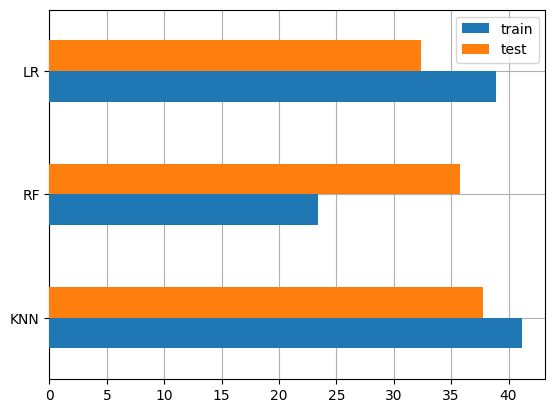

In [28]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Terlihat bahwa model Linear Regression menunjukkan performa paling stabil dari ketiga variabel

### R² Score (R-squared)

R² Score (R-squared) untuk mengukur seberapa baik model sesuai dengan data, dan seberapa baik model dapat memprediksi hasil di masa mendatang.

In [29]:
from sklearn.metrics import r2_score

# Buat DataFrame untuk menyimpan R² score
r2 = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','LR'])

# Hitung R² score untuk masing-masing model
r2.loc['KNN', 'train'] = r2_score(y_train, knn.predict(X_train))
r2.loc['KNN', 'test'] = r2_score(y_test, knn.predict(X_test))

r2.loc['RF', 'train'] = r2_score(y_train, RF.predict(X_train))
r2.loc['RF', 'test'] = r2_score(y_test, RF.predict(X_test))

r2.loc['LR', 'train'] = r2_score(y_train, LR.predict(X_train))
r2.loc['LR', 'test'] = r2_score(y_test, LR.predict(X_test))

# Tampilkan hasil
r2

,train,test
KNN,0.999541,0.999502
RF,0.999739,0.999529
LR,0.999566,0.999573


Histogram dari R² Score (R-squared)

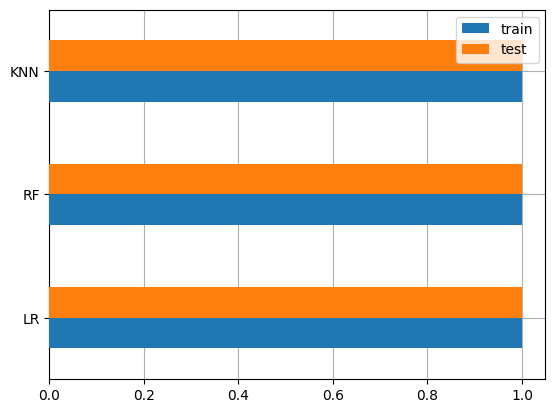

In [30]:
fig, ax = plt.subplots()
r2.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Terlihat bahwa ketiga model sudah sangat baik dalam pengujian R2

---
Histogram dari kedua teknik evaluasi, Mean Squared Error (MSE) dengan R² Score (R-squared)

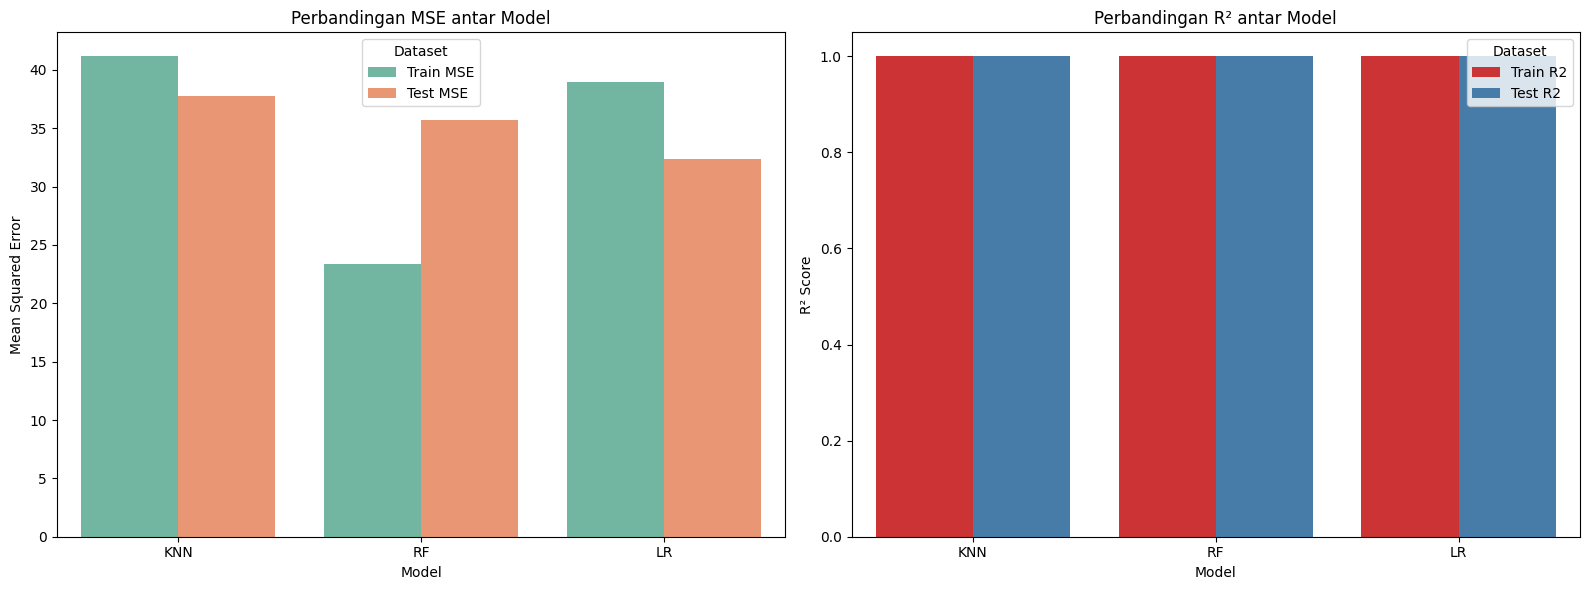

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data MSE dan R2 dari hasil sebelumnya
mse_data = {
    'Model': ['KNN', 'RF', 'LR'],
    'Train MSE': [41.160492, 23.37272, 38.921623],
    'Test MSE': [37.756777, 35.745972, 32.365056]
}

r2_data = {
    'Model': ['KNN', 'RF', 'LR'],
    'Train R2': [0.999541, 0.999739, 0.999566],
    'Test R2': [0.999502, 0.999529, 0.999573]
}

mse_df = pd.DataFrame(mse_data)
r2_df = pd.DataFrame(r2_data)

# Plotting
plt.figure(figsize=(16, 6))

# Subplot MSE
plt.subplot(1, 2, 1)
mse_df_melted = mse_df.melt(id_vars='Model', var_name='Dataset', value_name='MSE')
sns.barplot(data=mse_df_melted, x='Model', y='MSE', hue='Dataset', palette='Set2')
plt.title('Perbandingan MSE antar Model')
plt.ylabel('Mean Squared Error')

# Subplot R2
plt.subplot(1, 2, 2)
r2_df_melted = r2_df.melt(id_vars='Model', var_name='Dataset', value_name='R2 Score')
sns.barplot(data=r2_df_melted, x='Model', y='R2 Score', hue='Dataset', palette='Set1')
plt.title('Perbandingan R² antar Model')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()


Linear Regression memberikan generalisasi terbaik dengan MSE dan R² test tertinggi, sementara Random Forest unggul di data train namun cenderung overfitting, dan KNN cukup baik meski performanya tidak sebaik dua model lainnya.